In [1]:
import os
import warnings
# suppress warning
warnings.simplefilter("ignore", UserWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [2]:
raw_dir = ['../dataset/mp_data/voltage_2020_08_05.csv']
target_dir = ['../regression/result/dnn_2020_08_29/1988']
prefix = 'Na_test_krr_best_'

In [3]:
def show_diff(dir_name):
    raw_data = pd.read_csv(raw_dir[0])
    raw_data['volume_change'] = 100 / (1 + raw_data['max_delta_volume'].values)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'), index_col=0)
    pred_data['diff'] = pred_data['test_pred'] - pred_data['test_ground_truth']
    pred_data['diff_abs'] = abs(pred_data['diff'])
    pred_data = pred_data.sort_values(by=['diff_abs'], ascending=False)
    concat_data = pd.merge(pred_data, raw_data, left_on='raw_index', right_on='Unnamed: 0')
    return concat_data
   
show_cols = [
    'test_ground_truth', 'test_pred', 'raw_index', 'diff', 'diff_abs', 'formula_charge', 
    'formula_discharge', 'max_delta_volume', 'volume_change',
]
concat_data = show_diff(target_dir[0])
concat_data[show_cols][0:15]

,test_ground_truth,test_pred,raw_index,diff,diff_abs,formula_charge,formula_discharge,max_delta_volume,volume_change
0,1.779477,3.396172,4196,1.616695,1.616695,Na4Cr2C4SO16,Na6Cr2C4SO16,0.039853,96.167442
1,4.819775,3.440330,4355,-1.379445,1.379445,Fe5O8,NaFe5O8,0.041248,96.038614
2,4.787339,3.578296,4401,-1.209044,1.209044,Ni3P4O15,Na4Ni3P4O15,0.028661,97.213784
3,2.504311,3.652136,4413,1.147824,1.147824,NaCrCSO7,Na2CrCSO7,0.082532,92.376063
4,2.703531,3.758958,4369,1.055427,1.055427,Fe7(PO4)6,NaFe7(PO4)6,0.013295,98.687945
5,2.653346,3.682189,3958,1.028843,1.028843,Li2FePCO7,NaLi2FePCO7,0.057679,94.546679
6,4.975646,3.954172,3700,-1.021474,1.021474,Ti3Cr(PO4)6,Na2Ti3Cr(PO4)6,0.006301,99.373809
7,2.809001,3.813062,4332,1.004061,1.004061,Li5Fe2P2(CO7)2,NaLi5Fe2P2(CO7)2,0.031346,96.960666
8,3.723081,2.726140,4121,-0.996941,0.996941,Mo3P3O13,NaMo3P3O13,0.000887,99.911369
9,4.141491,3.147429,4155,-0.994062,0.994062,V2P2O9,NaV2P2O9,0.027418,97.331369


In [4]:
df_high_vol = concat_data[concat_data['test_ground_truth'] > 3.5] 
print('voltage > 3.5 case MAE') 
print(mean_absolute_error(df_high_vol['test_ground_truth'].values, df_high_vol['test_pred'].values)) 
print('original MAE')
print(mean_absolute_error(concat_data['test_ground_truth'].values, concat_data['test_pred'].values))

voltage > 3.5 case MAE
0.402916198139314
original MAE
0.37638153635953897


In [5]:
# see regression result

def yy_plot(dir_name, file_name):
    na_score = pd.read_csv(os.path.join(dir_name, 'test_Na_score.csv'))
    print(na_score)
    pred_data = pd.read_csv(os.path.join(dir_name, 'test_Na_pred_value.csv'))
    min_val = min(min(pred_data['test_ground_truth']), min(pred_data['test_pred']))
    max_val = max(max(pred_data['test_ground_truth']), max(pred_data['test_pred']))
    margin = (max_val - min_val) * 0.1
#     xy_lim = [min_val - margin, max_val + margin]
    xy_lim = [0, 6.5]
    fig = plt.figure(figsize=[10, 10])
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(xy_lim, xy_lim, 'k-')
    ax.plot(pred_data['test_ground_truth'], pred_data['test_pred'], 'b.', markersize=15)
    ax.set_xlim(xy_lim)
    ax.set_ylim(xy_lim)
    ax.tick_params(labelsize=20)
    fig.savefig(os.path.join('png', '{}.png'.format(file_name)))

  Unnamed: 0   R2_test  MAE_test  RMSE_test
0       test  0.614118  0.376382   0.483252


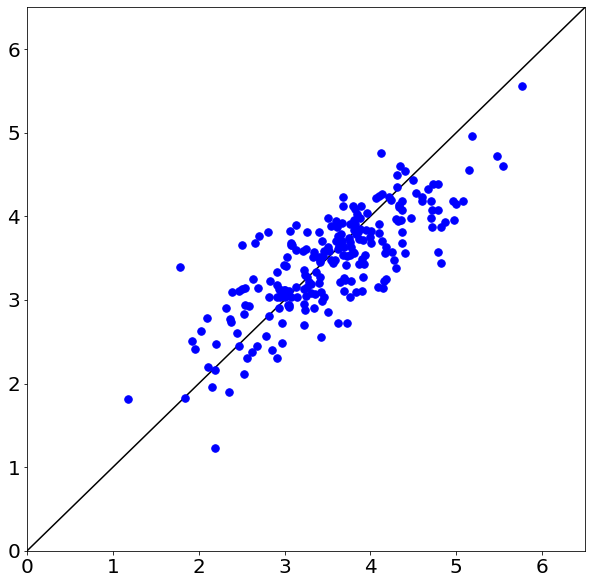

In [6]:
yy_plot(target_dir[0], prefix + 'yyplot')